#### CHALLENGE 1

In [1]:
import requests
import random

In [8]:
response = requests.get("https://xkcd.com")
response.headers

{'Connection': 'keep-alive', 'Content-Length': '3039', 'Server': 'nginx', 'Content-Type': 'text/html; charset=UTF-8', 'Last-Modified': 'Tue, 24 Jan 2023 05:08:14 GMT', 'ETag': 'W/"63cf67be-1e2f"', 'Expires': 'Wed, 25 Jan 2023 03:56:40 GMT', 'Cache-Control': 'max-age=300', 'Content-Encoding': 'gzip', 'Via': '1.1 varnish, 1.1 varnish', 'Accept-Ranges': 'bytes', 'Date': 'Wed, 25 Jan 2023 11:23:32 GMT', 'Age': '64', 'X-Served-By': 'cache-dfw-kdfw8210070-DFW, cache-cdg20788-CDG', 'X-Cache': 'HIT, HIT', 'X-Cache-Hits': '9, 1', 'X-Timer': 'S1674645813.836033,VS0,VE2', 'Vary': 'Accept-Encoding'}

In [9]:
response.headers["Expires"]

'Wed, 25 Jan 2023 03:56:40 GMT'

In [10]:
#Provide all HTML codes
response.text
#response.content

'<!DOCTYPE html>\n<html>\n<head>\n<link rel="stylesheet" type="text/css" href="/s/7d94e0.css" title="Default"/>\n<title>xkcd: Lane Change Highway</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n<link rel="shortcut icon" href="/s/919f27.ico" type="image/x-icon"/>\n<link rel="icon" href="/s/919f27.ico" type="image/x-icon"/>\n<link rel="alternate" type="application/atom+xml" title="Atom 1.0" href="/atom.xml"/>\n<link rel="alternate" type="application/rss+xml" title="RSS 2.0" href="/rss.xml"/>\n<!-- <script type="text/javascript" src="/s/b66ed7.js" async></script>\n<script type="text/javascript" src="/s/1b9456.js" async></script> -->\n\n<meta property="og:site_name" content="xkcd">\n\n<meta property="og:title" content="Lane Change Highway">\n<meta property="og:url" content="https://xkcd.com/2728/">\n<meta property="og:image" content="https://imgs.xkcd.com/comics/lane_change_highway_2x.png">\n<meta name="twitter:card" content="summary_large_image">\n\n</head>\n<body>\n<div 

Image sucessfully Downloaded:  test.png


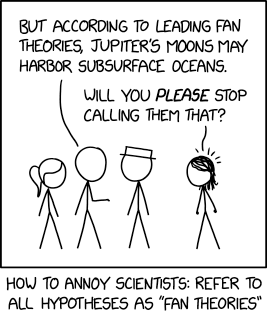

In [8]:
from io import StringIO
from PIL import Image
import shutil



img_url = "https://imgs.xkcd.com/comics/fan_theories.png"
file_name = "test.png"
result = requests.get(img_url,stream=True)
if result.status_code == 200:
    with open(file_name,'wb') as f:
        shutil.copyfileobj(result.raw, f)
    print('Image sucessfully Downloaded: ',file_name)
else:
    print('Image Couldn\'t be retrieved')
Image.open("test.png")

### CHALLENGE 2

In [11]:
response = requests.get("https://httpbin.org/get")
response.headers

{'Date': 'Wed, 25 Jan 2023 11:51:42 GMT', 'Content-Type': 'application/json', 'Content-Length': '312', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

In [12]:
response.text

'{\n  "args": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate, br", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.1", \n    "X-Amzn-Trace-Id": "Root=1-63d117ce-7537dd1b013ad0be5adee7ea"\n  }, \n  "origin": "185.146.221.98", \n  "url": "https://httpbin.org/get"\n}\n'

In [15]:
#Add parameters to the request 'things':2,'total':25
test = {'things': 2, 'total': 25}

response = requests.get("https://httpbin.org/get", params=test)
response.content



b'{\n  "args": {\n    "things": "2", \n    "total": "25"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate, br", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.1", \n    "X-Amzn-Trace-Id": "Root=1-63d11898-3829abd2111c60d50183a433"\n  }, \n  "origin": "185.146.221.98", \n  "url": "https://httpbin.org/get?things=2&total=25"\n}\n'

In [39]:
#Add username and password as parameters
test = {'username': "username", 'password': "password"}

response = requests.get("https://httpbin.org/get", params=test)
response.content




b'{\n  "args": {\n    "password": "password", \n    "username": "username"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate, br", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.1", \n    "X-Amzn-Trace-Id": "Root=1-63d12b86-7e879e9c451133ef44041e22"\n  }, \n  "origin": "185.146.221.98", \n  "url": "https://httpbin.org/get?username=username&password=password"\n}\n'

In [41]:
#Export username and password as dictionary
respdic = response.json()["args"]
respdic


{'password': 'password', 'username': 'username'}

In [43]:

# Add username and password as parameters
# Export username and password as dictionary
ploads = {"username": "u", "password": "p"}
response = requests.post("https://httpbin.org/post", data = ploads)
results = response.json()
print(results)
dicinfo = dict(results["form"])
print(dicinfo)

{'args': {}, 'data': '', 'files': {}, 'form': {'password': 'p', 'username': 'u'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate, br', 'Content-Length': '21', 'Content-Type': 'application/x-www-form-urlencoded', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.28.1', 'X-Amzn-Trace-Id': 'Root=1-63d1b800-01aa780f45b14881240fb291'}, 'json': None, 'origin': '84.98.228.134', 'url': 'https://httpbin.org/post'}
{'password': 'p', 'username': 'u'}


### Challenge 3: Hidden Cold Joke


In [47]:
from github import Github
import os
#https://api.github.com/search/code?q=.scavengerhunt+in:path+repo:ironhack-datalabs/scavenger

In [51]:
g = Github()
g.get_user()

AuthenticatedUser(login=None)

# USING WRAPPER

In [52]:
owner = "ironhack-datalabs"
reponame= "scavenger"
repocpn = g.get_repo(f"{owner}/{reponame}")
repcontents = repocpn.get_contents("")

In [59]:
repcontents = repocpn.get_contents("")

In [60]:
#CONTAINS THE DIRECTORIES
for icontent in repcontents:
    print(icontent)
icontent.path

ContentFile(path=".gitignore")
ContentFile(path="15024")
ContentFile(path="15534")
ContentFile(path="17020")
ContentFile(path="30351")
ContentFile(path="40303")
ContentFile(path="44639")
ContentFile(path="45525")
ContentFile(path="47222")
ContentFile(path="47830")
ContentFile(path="49418")
ContentFile(path="50896")
ContentFile(path="55417")
ContentFile(path="55685")
ContentFile(path="60224")
ContentFile(path="64880")
ContentFile(path="66032")
ContentFile(path="68848")
ContentFile(path="70751")
ContentFile(path="70985")
ContentFile(path="88596")
ContentFile(path="89046")
ContentFile(path="89338")
ContentFile(path="91701")
ContentFile(path="97881")
ContentFile(path="98750")


'98750'

In [28]:
owner = "ironhack-datalabs"
repo = "scavenger"
query_url = f"https://api.github.com/repos/{owner}/{repo}/contents/*.scavengerhunt"
r = requests.get(query_url)



In [29]:
r.content

b'{"message":"Not Found","documentation_url":"https://docs.github.com/rest"}'

In [2]:
# Create an API request 
url = "https://api.github.com/search/code?q=.scavengerhunt+in:path+repo:ironhack-datalabs/scavenger"
result = requests.get(url)

In [3]:
search_results = result.json()["items"] #GET ITEMS directly
print(search_results)

[{'name': '.0016.scavengerhunt', 'path': '47222/.0016.scavengerhunt', 'sha': 'f5cb13223fdc1b11f4cfbbe1694f533b3c579fa0', 'url': 'https://api.github.com/repositories/162375181/contents/47222/.0016.scavengerhunt?ref=9308ccc8a4c34c5e3a991ee815222a9691c32476', 'git_url': 'https://api.github.com/repositories/162375181/git/blobs/f5cb13223fdc1b11f4cfbbe1694f533b3c579fa0', 'html_url': 'https://github.com/ironhack-datalabs/scavenger/blob/9308ccc8a4c34c5e3a991ee815222a9691c32476/47222/.0016.scavengerhunt', 'repository': {'id': 162375181, 'node_id': 'MDEwOlJlcG9zaXRvcnkxNjIzNzUxODE=', 'name': 'scavenger', 'full_name': 'ironhack-datalabs/scavenger', 'private': False, 'owner': {'login': 'ironhack-datalabs', 'id': 44225188, 'node_id': 'MDEyOk9yZ2FuaXphdGlvbjQ0MjI1MTg4', 'avatar_url': 'https://avatars.githubusercontent.com/u/44225188?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/ironhack-datalabs', 'html_url': 'https://github.com/ironhack-datalabs', 'followers_url': 'https://api.githu

In [4]:
import pandas as pd


In [5]:
df = pd.json_normalize(search_results)
df.head()
df.sort_values(by="name", inplace=True, ignore_index=True)



,name,path,sha,url,git_url,html_url,score,repository.id,repository.node_id,repository.name,...,repository.merges_url,repository.archive_url,repository.downloads_url,repository.issues_url,repository.pulls_url,repository.milestones_url,repository.notifications_url,repository.labels_url,repository.releases_url,repository.deployments_url
0,.0016.scavengerhunt,47222/.0016.scavengerhunt,f5cb13223fdc1b11f4cfbbe1694f533b3c579fa0,https://api.github.com/repositories/162375181/...,https://api.github.com/repositories/162375181/...,https://github.com/ironhack-datalabs/scavenger...,1.0,162375181,MDEwOlJlcG9zaXRvcnkxNjIzNzUxODE=,scavenger,...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...
1,.0009.scavengerhunt,97881/.0009.scavengerhunt,f5cb13223fdc1b11f4cfbbe1694f533b3c579fa0,https://api.github.com/repositories/162375181/...,https://api.github.com/repositories/162375181/...,https://github.com/ironhack-datalabs/scavenger...,1.0,162375181,MDEwOlJlcG9zaXRvcnkxNjIzNzUxODE=,scavenger,...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...
2,.0021.scavengerhunt,30351/.0021.scavengerhunt,fb828e4a926b0a84fc16111fc0ee3eeec41f0ce7,https://api.github.com/repositories/162375181/...,https://api.github.com/repositories/162375181/...,https://github.com/ironhack-datalabs/scavenger...,1.0,162375181,MDEwOlJlcG9zaXRvcnkxNjIzNzUxODE=,scavenger,...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...
3,.0023.scavengerhunt,55417/.0023.scavengerhunt,04d0ffb8d895a9e3ee244493e829a24468bd1f60,https://api.github.com/repositories/162375181/...,https://api.github.com/repositories/162375181/...,https://github.com/ironhack-datalabs/scavenger...,1.0,162375181,MDEwOlJlcG9zaXRvcnkxNjIzNzUxODE=,scavenger,...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...
4,.0019.scavengerhunt,70751/.0019.scavengerhunt,09e16f36b3c4993ba924b1074629283a49869be9,https://api.github.com/repositories/162375181/...,https://api.github.com/repositories/162375181/...,https://github.com/ironhack-datalabs/scavenger...,1.0,162375181,MDEwOlJlcG9zaXRvcnkxNjIzNzUxODE=,scavenger,...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.github.com/repos/ironhack-datalabs...,https://api.gi

In [27]:
df.columns


Index(['name', 'path', 'sha', 'url', 'git_url', 'html_url', 'score',
       'repository.id', 'repository.node_id', 'repository.name',
       'repository.full_name', 'repository.private', 'repository.owner.login',
       'repository.owner.id', 'repository.owner.node_id',
       'repository.owner.avatar_url', 'repository.owner.gravatar_id',
       'repository.owner.url', 'repository.owner.html_url',
       'repository.owner.followers_url', 'repository.owner.following_url',
       'repository.owner.gists_url', 'repository.owner.starred_url',
       'repository.owner.subscriptions_url',
       'repository.owner.organizations_url', 'repository.owner.repos_url',
       'repository.owner.events_url', 'repository.owner.received_events_url',
       'repository.owner.type', 'repository.owner.site_admin',
       'repository.html_url', 'repository.description', 'repository.fork',
       'repository.url', 'repository.forks_url', 'repository.keys_url',
       'repository.collaborators_url', 'reposit

In [15]:
list_urls = df["url"]
print(list_urls[10])

https://api.github.com/repositories/162375181/contents/50896/.0011.scavengerhunt?ref=9308ccc8a4c34c5e3a991ee815222a9691c32476


In [16]:
list_content = []
for file_url in list_urls:
    fileresp = requests.get(file_url)
    list_content.append(fileresp.json()["content"])



In [41]:
print(list_content)
#DECODE
import base64
decoded_joke = []
for contenti in list_content:
    decoded_joke.append(base64.b64decode(contenti).decode('utf-8')) #Bytes to string
    #print(base64.b64decode(contenti))
print(decoded_joke)
joke = " ".join(decoded_joke)
joke = joke.replace("\n","")
print(joke)

['SW4K\n', 'ZGF0YQo=\n', 'c2NpZW5jZSwK\n', 'ODAK\n', 'cGVyY2VudAo=\n', 'b2YK\n', 'dGltZQo=\n', 'c3BlbnQK\n', 'aXMK\n', 'cHJlcGFyaW5nCg==\n', 'ZGF0YSwK\n', 'MjAK\n', 'cGVyY2VudAo=\n', 'b2YK\n', 'dGltZQo=\n', 'aXMK\n', 'c3BlbnQK\n', 'Y29tcGxhaW5pbmcK\n', 'YWJvdXQK\n', 'dGhlCg==\n', 'bmVlZAo=\n', 'dG8K\n', 'cHJlcGFyZQo=\n', 'ZGF0YS4K\n']
['In\n', 'data\n', 'science,\n', '80\n', 'percent\n', 'of\n', 'time\n', 'spent\n', 'is\n', 'preparing\n', 'data,\n', '20\n', 'percent\n', 'of\n', 'time\n', 'is\n', 'spent\n', 'complaining\n', 'about\n', 'the\n', 'need\n', 'to\n', 'prepare\n', 'data.\n']
In data science, 80 percent of time spent is preparing data, 20 percent of time is spent complaining about the need to prepare data.
